<a href="https://colab.research.google.com/github/Veera9014/practice-data-science-code/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv('pima_indians_diabetes.csv')

In [ ]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


EDA

visualize the data

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
features=data.iloc[:,0:8]

In [ ]:
features

,6,148,72,35,0,33.6,0.627,50
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63
763,2,122,70,27,0,36.8,0.340,27
764,5,121,72,23,112,26.2,0.245,30
765,1,126,60,0,0,30.1,0.349,47


In [ ]:
tmodel=TSNE(n_components=2)

tvalues=tmodel.fit_transform(features)
tvalues

array([[-14.002161,   7.874058],
       [-39.60262 ,  18.401983],
       [ 14.013186, -15.891184],
       ...,
       [ 20.031313,  -8.243288],
       [-33.54776 ,   6.549677],
       [-15.250941,   9.193621]], dtype=float32)

In [ ]:
import seaborn as sns

In [ ]:
tdata=pd.DataFrame(tvalues,columns=[6,148])

tdata['veera']=data['6']
tdata

,6,148,veera
0,-14.002161,7.874058,1
1,-39.602619,18.401983,8
2,14.013186,-15.891184,1
3,32.159187,-4.667653,0
4,-31.646681,-1.413551,5
...,...,...,...
762,37.738674,-1.561545,10
763,-21.213636,14.360126,2
764,20.031313,-8.243288,5
765,-33.547760,6.549677,1


In [ ]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    float32
 1   148     767 non-null    float32
 2   veera   767 non-null    int64  
dtypes: float32(2), int64(1)
memory usage: 12.1 KB


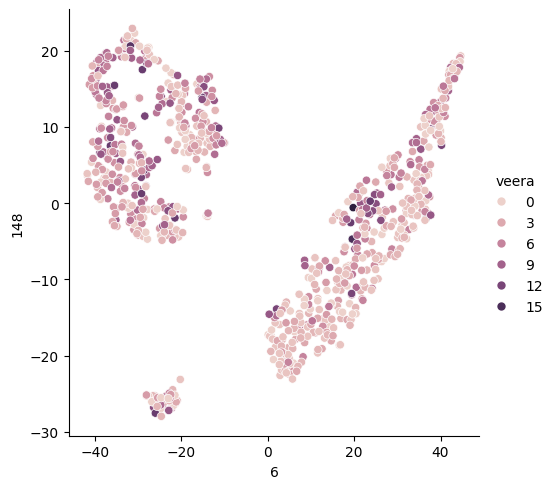

In [ ]:
sns.relplot(tdata,x=6,y=148,kind='scatter',hue='veera')
plt.show()

split data set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data.iloc[:,:8]
y=data.iloc[:,8]

In [ ]:
x.head()

,6,148,72,35,0,33.6,0.627,50
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30


In [ ]:
y.head()

,1
0,0
1,1
2,0
3,1
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((613, 8), (154, 8), (613,), (154,))

### build the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
clf= DecisionTreeClassifier(max_depth=8, criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
yhat_train=clf.predict(x_train)

In [ ]:
cm=confusion_matrix(y_train,yhat_train)
cm

array([[391,  12],
       [ 46, 164]])

In [ ]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       403
           1       0.93      0.78      0.85       210

    accuracy                           0.91       613
   macro avg       0.91      0.88      0.89       613
weighted avg       0.91      0.91      0.90       613



In [ ]:
yhat_test=clf.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,yhat_test)
print(classification_report(y_test,yhat_test))
cm

              precision    recall  f1-score   support

           0       0.77      0.82      0.80        97
           1       0.66      0.58      0.62        57

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154



array([[80, 17],
       [24, 33]])

In [ ]:
iris=pd.read_csv('iris.csv')

In [ ]:
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [ ]:
x=iris.iloc[:,:5]
y=iris.iloc[:,5]

In [ ]:
x.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 5), (30, 5), (120,), (30,))

### visalize the data

In [ ]:
tsne_model=TSNE(n_components=2)
vis_data=tsne_model.fit_transform(x)
vis_data


array([[-1.28671618e+01,  8.03754210e-01],
       [-1.28024797e+01,  7.06568122e-01],
       [-1.26971188e+01,  1.05039907e+00],
       [-1.26019382e+01,  1.10191262e+00],
       [-1.25357370e+01,  5.19195378e-01],
       [-1.24358063e+01,  4.89922434e-01],
       [-1.23099966e+01,  1.13133991e+00],
       [-1.22370443e+01,  4.89265263e-01],
       [-1.21076202e+01,  1.11354923e+00],
       [-1.19898701e+01,  1.10170519e+00],
       [-1.19075909e+01,  5.11004806e-01],
       [-1.17896156e+01,  5.37418842e-01],
       [-1.16441736e+01,  1.05187678e+00],
       [-1.15378151e+01,  5.60947776e-01],
       [-1.13787546e+01,  1.00325429e+00],
       [-1.12553883e+01,  5.61294258e-01],
       [-1.10987692e+01,  9.35337067e-01],
       [-1.09630280e+01,  5.70261478e-01],
       [-1.07938910e+01,  8.49570632e-01],
       [-1.06381216e+01,  8.65900815e-01],
       [-1.04852257e+01,  5.96882582e-01],
       [-1.03216963e+01,  6.22870445e-01],
       [-1.01366339e+01,  8.19702268e-01],
       [-9.

In [ ]:
iris_vis=pd.DataFrame(vis_data,columns=['c1','c2'])
iris_vis['Species']=iris['Species']
iris_vis.head()

,c1,c2,Species
0,-12.867162,0.803754,setosa
1,-12.802480,0.706568,setosa
2,-12.697119,1.050399,setosa
3,-12.601938,1.101913,setosa
4,-12.535737,0.519195,setosa


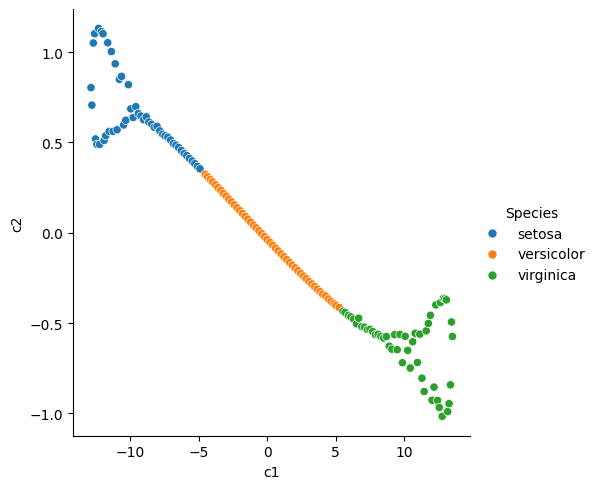

In [ ]:
sns.relplot(data=iris_vis,x='c1',y='c2',kind='scatter',hue='Species')
plt.show()

In [ ]:
iris_model=DecisionTreeClassifier(max_depth=2,criterion='gini')
iris_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
yhat_train=iris_model.predict(x_train)

In [ ]:
cm=confusion_matrix(y_train,yhat_train)
print(classification_report(y_train,yhat_train))
cm

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      1.00      1.00        41
   virginica       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



array([[40,  0,  0],
       [ 0, 41,  0],
       [ 0,  0, 39]])

In [ ]:
yhat_test=iris_model.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,yhat_test)
print(classification_report(y_test,yhat_test))
cm

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

visualise the tree

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [ ]:
fnames=x.head().columns.values
fnames

array(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width'], dtype=object)

In [ ]:
cnames=iris['Species'].unique()
cnames

array(['setosa', 'versicolor', 'virginica'], dtype=object)

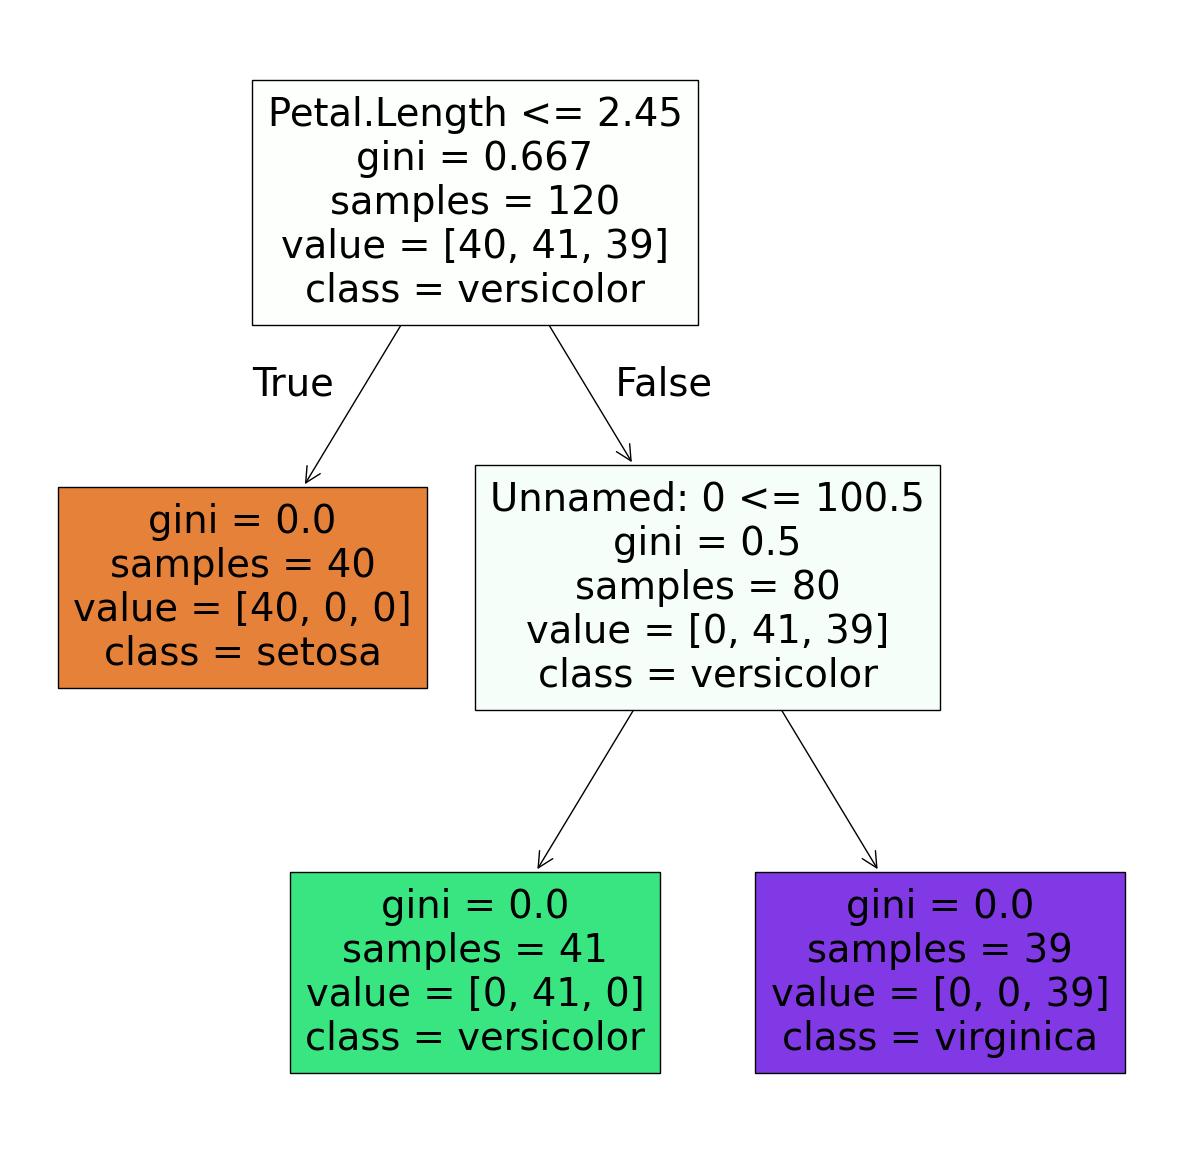

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(iris_model,  feature_names=fnames, class_names=cnames, filled=True)
plt.show()